In [1]:
from matplotlib import dates
dates.set_epoch('1800-01-01')

import xarray as xr
import numpy as np
import pandas as pd

In [4]:
ds = xr.open_dataset('ERA5.predictors.1950-2019.nc')
ds.close()
ds

<xarray.Dataset>
Dimensions:  (lon: 361, lat: 361, time: 840)
Coordinates:
  * lon      (lon) float32 -90.0 -89.75 -89.5 -89.25 ... -0.75 -0.5 -0.25 0.0
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... -0.75 -0.5 -0.25 0.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    r        (time, lat, lon) float32 ...
    z        (time, lat, lon) float32 ...
    cape     (time, lat, lon) float32 ...
    cin      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-27 05:30:20 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

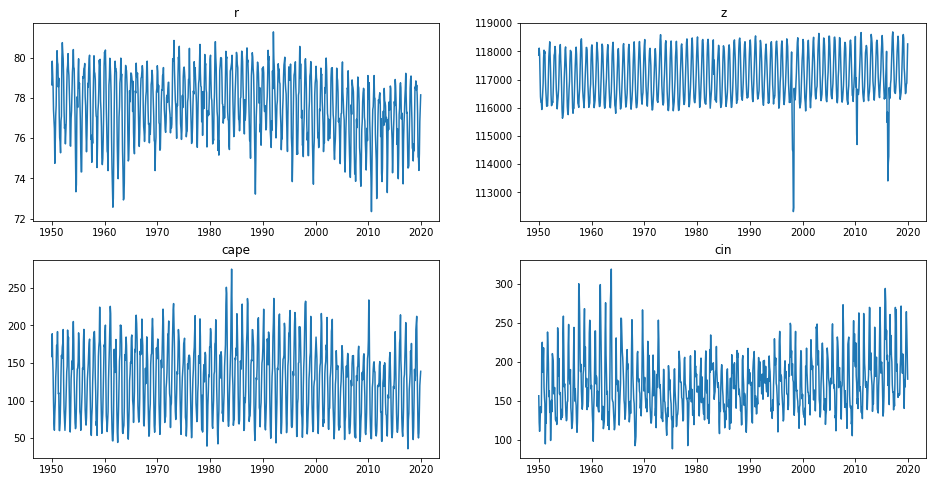

In [7]:
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
climatology = ds.mean(dim='time').to_array()
climatology.sortby('lat','lon')
sqrt_cos_lat_weights = np.abs(np.cos(np.deg2rad(ds.lat)))
mean_timeseries = ds.weighted(sqrt_cos_lat_weights).mean(dim=['lat','lon']).to_array()
# fig = climatology.plot(x='lon',y='lat',transform=ccrs.PlateCarree(),vmax=250,subplot_kws={'projection':ccrs.Orthographic(central_longitude=-60,central_latitude=-15)})
# fig = climatology.plot(x='lon',y='lat',col='variable',col_wrap=2,transform=ccrs.PlateCarree(),vmax=1000,subplot_kws={'projection':ccrs.Orthographic(central_longitude=-60,central_latitude=-15)})
# for p in fig.axes.flatten():
#     p.coastlines()
fig,axs = plt.subplots(2,2,figsize=(16,8))
for v,ax in zip(mean_timeseries,axs.flatten()):
    ax.plot(v.time,v.values)
    ax.set_title(v['variable'].values)

In [45]:
ds = xr.open_dataset('precip.mon.total.1x1.v2020.nc')
ds = ds.sel(time=ds['time.year']>=1950)
# ds = ds.sel(time=ds['time.month'].isin([9,10,11]))
ds.close()
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/download_gate....
    Conventions:      CF 1.0
    dataset_title:    Global Precipitation Climatology Centre (GPCC)
    title:            GPCC Full Data Reanalysis Version 2020 1.0x1.0 Monthly ...
    history:          Created 07/2021  based on V2020 data obtained via ftp
    References:       https://www.psl.noaa.gov/data/gridded/data.gpcc.html

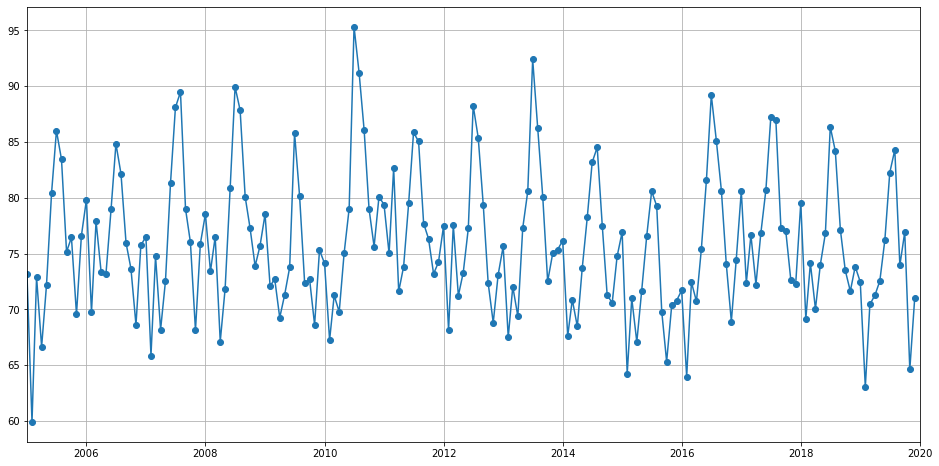

In [46]:
climatology = ds.mean(dim='time').to_array()
climatology.sortby('lat','lon')
sqrt_cos_lat_weights = np.abs(np.cos(np.deg2rad(ds.lat)))
mean_timeseries = ds.weighted(sqrt_cos_lat_weights).mean(dim=['lat','lon']).to_array()
# fig = climatology.plot(x='lon',y='lat',transform=ccrs.PlateCarree(),vmax=250,subplot_kws={'projection':ccrs.Orthographic(central_longitude=-60,central_latitude=-15)})
# fig = climatology.plot(x='lon',y='lat',col='variable',col_wrap=2,transform=ccrs.PlateCarree(),vmax=1000,subplot_kws={'projection':ccrs.Orthographic(central_longitude=-60,central_latitude=-15)})
# for p in fig.axes.flatten():
#     p.coastlines()
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(mean_timeseries.time,mean_timeseries.values.squeeze(),'o-')
# ax.set_title(mean_timeseries['variable'].values)
ax.set_xlim(np.datetime64('2005-01-01'),np.datetime64('2020-01-01'))
ax.grid()

numpy.datetime64('2000-01-01')